# Gaussian-Mixture Black Holes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as gauss
import seaborn as sns
sns.color_palette('deep')
sns.set()

In [2]:
data = np.load('/Users/oliverbenjaminrossi/Visual Studio/Università/Astrostatistics and ML/astrostatistics_bicocca_2023/solutions/formationchannels.npy', allow_pickle=True)

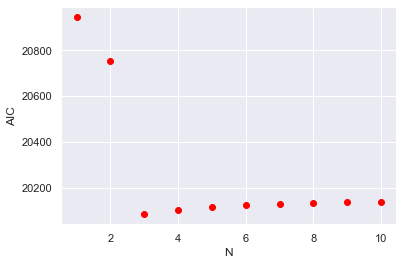

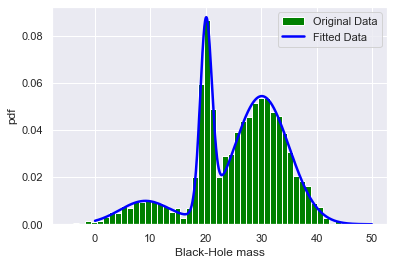

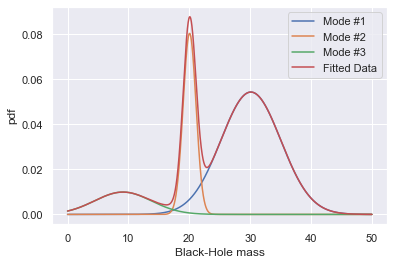

In [3]:
grid_resolution = 10000
components = np.arange(1, 11, 1)
xgrid = np.linspace(0, 50, 10000).reshape(grid_resolution, 1)   #scikit wants it this way
aic = []

#Fitting for N modes increasing by 1 each step
for i in range(len(components)):
    n_model = gauss(n_components=components[i], random_state=1)
    fits = n_model.fit(data)
    aic.append(fits.aic(data))


#Finding the optimal number of modes with Akaike factor
aic = np.array(aic)

plt.ylabel('AIC')
plt.xlabel('N')
plt.scatter(components, aic, color='red')
plt.show()

mask = tuple([aic == np.min(aic)])

aic_best = aic[mask]
N_best = int(components[mask])


#Fitting data
bestfit = gauss(n_components=N_best, random_state=1).fit(data)
pdf = np.exp(bestfit.score_samples(xgrid))  #Exponentiating the log-likelihood

#Plotting fitted pdf
plt.ylabel('pdf')
plt.xlabel('Black-Hole mass')
plt.hist(data, bins=50, density=True, label='Original Data', color='green')
plt.plot(xgrid, pdf, c='blue', label='Fitted Data', linewidth=2.5)
plt.legend()
plt.show()

#Isolating single modes
superposition = bestfit.predict_proba(xgrid)
single_gaussians = superposition * pdf[:,np.newaxis]

#Plotting individual modes
for i in range(N_best):
    current_plot = 'Mode #' + str(i+1)
    plt.plot(xgrid, single_gaussians[:,i], label=current_plot)
plt.plot(xgrid, pdf, label='Fitted Data')

plt.ylabel('pdf')
plt.xlabel('Black-Hole mass')
plt.legend()
plt.show()

